In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import socceraction

from statsbombpy import sb

In [2]:
info_Bundesliga = pd.read_csv('data/info_1516_Bundesliga.csv', index_col=0)
info_LaLiga = pd.read_csv('data/info_1516_LaLiga.csv', index_col=0)
info_Ligue1 = pd.read_csv('data/info_1516_Ligue1.csv', index_col=0)
info_PremierLeague = pd.read_csv('data/info_1516_PremierLeague.csv', index_col=0)
info_SerieA = pd.read_csv('data/info_1516_SerieA.csv', index_col=0)
info = pd.concat([info_Bundesliga, info_LaLiga, info_Ligue1, info_PremierLeague, info_SerieA], ignore_index=True)

values = pd.read_csv('data/values.csv', index_col=0)
values['game_id'] = info['game_id']
values.head()

,offensive_value,defensive_value,vaep_value,player_id,type_name,game_id
0,0.000000,-0.000000,0.000000,8387,pass,3890561
1,0.000009,-0.000079,-0.000070,5460,receival,3890561
2,0.000061,0.000015,0.000075,5460,dribble,3890561
3,0.000098,-0.000023,0.000075,5460,pass,3890561
4,-0.000121,0.000078,-0.000043,6039,receival,3890561


In [3]:
players = pd.read_csv('data/players.csv', index_col=0)

players = players[~players['starting_position_name'].apply(lambda x: 'G' in x)]
players = players[players['minutes_played'] >= 900]
players = players.reset_index().drop('index', axis=1)

players # 只针对非门将位置和踢满10场联赛及以上的

,player_id,player_name,starting_position_name,minutes_played,league
0,2936,Christophe Kerbrat,['RCB'],2722,Ligue1
1,2943,Lucas Deaux,"['LCB', 'CDM', 'RDM', 'LDM']",1250,Ligue1
2,2946,Frédéric Guilbert,"['RB', 'RCB']",2537,Ligue1
3,2950,Jonas Martin,"['LCM', 'LDM', 'LW', 'RDM', 'CAM', 'CDM']",3268,Ligue1
4,2953,Kader Mangane,"['LCB', 'RCB', 'CDM', 'CB', 'RDM']",2585,Ligue1
...,...,...,...,...,...
1522,401506,Grégory Pujol,"['CF', 'RCF', 'CAM', 'LW', 'LCF']",1200,Ligue1
1523,401507,Jérôme Le Moigne,"['CDM', 'RDM', 'LDM']",2474,Ligue1
1524,401509,David Ducourtioux,"['RCM', 'RM', 'CDM', 'LCM', 'RDM']",2687,Ligue1
1525,401512,Lionel Mathis,"['RDM', 'LDM', 'CDM']",1455,Ligue1


### 总VAEP得分

In [4]:
values_agg = values.groupby('player_id').agg({'vaep_value':['sum','mean']}).reset_index()
values_agg.columns = ['player_id', 'vaep_total', 'vaep_per_action']

result = pd.merge(values_agg, players, how='inner')

result['vaep_per_90'] = result['vaep_total'] / result['minutes_played'] * 90
result['no_actions'] = result['vaep_total'] / result['vaep_per_action']
result['no_actions_per_90'] = result['no_actions'] / result['minutes_played'] * 90

result.sort_values('vaep_per_90', ascending=False).head(30) # 结合当赛季球员进球助攻榜单分析

,player_id,vaep_total,vaep_per_action,player_name,starting_position_name,minutes_played,league,vaep_per_90,no_actions,no_actions_per_90
299,3672,40.215740,0.008781,Zlatan Ibrahimović,"['CF', 'RCF']",2533,Ligue1,1.428905,4580.0,162.731938
462,5503,39.931656,0.005891,Lionel Messi,"['RW', 'CAM', 'CF']",2818,LaLiga,1.275319,6778.0,216.472676
573,6399,25.013322,0.008937,Gareth Bale,"['CAM', 'RW', 'LW', 'CF', 'RCF']",1784,LaLiga,1.261883,2799.0,141.205157
1246,19677,28.023857,0.011232,Karim Benzema,['CF'],2023,LaLiga,1.246736,2495.0,110.998517
461,5497,40.719261,0.010905,Gonzalo Higuaín,"['RCF', 'LCF', 'CF']",3058,SerieA,1.198409,3734.0,109.895356
510,5668,35.804228,0.011144,Robert Lewandowski,"['CF', 'LCF']",2702,Bundesliga,1.192591,3213.0,107.020725
439,5246,42.562615,0.010973,Luis Suárez,"['CF', 'RW']",3257,LaLiga,1.176124,3879.0,107.187596
627,6677,13.575178,0.011408,Imanol Agirretxe,"['LCF', 'CF', 'LW']",1207,LaLiga,1.012234,1190.0,88.732394
308,3712,27.553637,0.012733,Pierre-Emerick Aubameyang,"['CF', 'RCF', 'RW']",2533,Bundesliga,0.979008,2164.0,76.889064
360,4320,34.042687,0.004737,Neymar,['LW'],3148,LaLiga,0.973266,7187.0,205.473316


In [5]:
result[result['league'] == 'Bundesliga'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).to_csv('top_Bundesliga.csv')
result[result['league'] == 'Bundesliga'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).head(10)

,player_name,starting_position_name,minutes_played,league,vaep_per_90,vaep_total
510,Robert Lewandowski,"['CF', 'LCF']",2702,Bundesliga,1.192591,35.804228
308,Pierre-Emerick Aubameyang,"['CF', 'RCF', 'RW']",2533,Bundesliga,0.979008,27.553637
1322,Adrián Ramos,"['RW', 'LCF', 'CF']",983,Bundesliga,0.879295,9.603853
1293,Alexander Meier,"['CAM', 'CF', 'LCF', 'LCM', 'RCF']",1699,Bundesliga,0.795544,15.018108
481,Thomas Müller,"['RCM', 'CF', 'CAM', 'LCM', 'RAM', 'RW', 'RM',...",2395,Bundesliga,0.784309,20.871327
48,Javier Hernández Balcázar,"['RCF', 'LCF', 'CF']",2255,Bundesliga,0.735076,18.417743
477,Julian Brandt,"['LW', 'LM', 'RM', 'CAM', 'RCF']",1681,Bundesliga,0.672514,12.561065
479,Marco Reus,"['RW', 'LW', 'CF', 'LCM']",1950,Bundesliga,0.670114,14.519139
467,Alfred Finnbogason,"['CF', 'RW']",1165,Bundesliga,0.667299,8.637814
1141,Claudio Pizarro,"['LCF', 'RCF', 'RCM', 'CAM', 'CF']",1825,Bundesliga,0.652432,13.229867


In [6]:
result[result['league'] == 'LaLiga'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).to_csv('top_LaLiga.csv')
result[result['league'] == 'LaLiga'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).head(10)

,player_name,starting_position_name,minutes_played,league,vaep_per_90,vaep_total
462,Lionel Messi,"['RW', 'CAM', 'CF']",2818,LaLiga,1.275319,39.931656
573,Gareth Bale,"['CAM', 'RW', 'LW', 'CF', 'RCF']",1784,LaLiga,1.261883,25.013322
1246,Karim Benzema,['CF'],2023,LaLiga,1.246736,28.023857
439,Luis Suárez,"['CF', 'RW']",3257,LaLiga,1.176124,42.562615
627,Imanol Agirretxe,"['LCF', 'CF', 'LW']",1207,LaLiga,1.012234,13.575178
360,Neymar,['LW'],3148,LaLiga,0.973266,34.042687
430,Cristiano Ronaldo,"['LW', 'CF', 'LCF']",3295,LaLiga,0.951545,34.837114
560,Ángel Correa,"['RCF', 'RM', 'LW', 'LCF']",1017,LaLiga,0.833848,9.422477
574,Kévin Gameiro,"['CF', 'LCF', 'RCF']",2163,LaLiga,0.794299,19.089659
458,Antoine Griezmann,"['LCF', 'RCF', 'LW', 'RM', 'RW', 'LM']",3134,LaLiga,0.792805,27.607222


In [7]:
result[result['league'] == 'Ligue1'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).to_csv('top_Ligue1.csv')
result[result['league'] == 'Ligue1'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).head(10)

,player_name,starting_position_name,minutes_played,league,vaep_per_90,vaep_total
299,Zlatan Ibrahimović,"['CF', 'RCF']",2533,Ligue1,1.428905,40.215740
21,Ángel Di María,"['RW', 'LM', 'LW', 'LCM', 'RCM']",2082,Ligue1,0.818379,18.931844
359,Edinson Cavani,"['CF', 'LW', 'LCF']",2379,Ligue1,0.758783,20.057167
509,Kamil Grosicki,"['RW', 'LW', 'RM', 'LM']",1636,Ligue1,0.711421,12.932054
454,Ousmane Dembélé,"['RM', 'LM', 'LW', 'RW', 'CF', 'CAM', 'RCF']",2017,Ligue1,0.704951,15.798743
370,Javier Pastore,"['RW', 'RCM', 'LCM', 'LW']",906,Ligue1,0.704350,7.090459
171,Rachid Ghezzal,"['RM', 'RW']",1682,Ligue1,0.703260,13.143148
200,Alexandre Lacazette,"['RCF', 'LCF', 'CF']",3099,Ligue1,0.682091,23.486681
646,Wissam Ben Yedder,"['RAM', 'LAM', 'LCF', 'CAM', 'RCF', 'RM', 'CF']",2971,Ligue1,0.680006,22.447747
277,Sofiane Boufal,"['RCF', 'LW', 'RW', 'CAM', 'LCF']",2412,Ligue1,0.661234,17.721080


In [8]:
result[result['league'] == 'PremierLeague'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).to_csv('top_PremierLeague.csv')
result[result['league'] == 'PremierLeague'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).head(10)

,player_name,starting_position_name,minutes_played,league,vaep_per_90,vaep_total
112,Sergio Agüero,"['CF', 'RCF', 'LCF']",2462,PremierLeague,0.972413,26.600905
240,Daniel Sturridge,"['CF', 'RCF', 'LCF']",1038,PremierLeague,0.833246,9.610107
1132,Harry Kane,['CF'],3536,PremierLeague,0.777324,30.540185
176,Alexis Sánchez,"['LW', 'RW']",2554,PremierLeague,0.761610,21.612795
1135,Jamie Vardy,"['LCF', 'RCF', 'CF']",3314,PremierLeague,0.706085,25.999615
228,Philippe Coutinho,"['LW', 'CAM', 'RW', 'LM', 'LCM', 'LAM']",2097,PremierLeague,0.705907,16.447622
269,Olivier Giroud,['CF'],2577,PremierLeague,0.693242,19.849842
320,Riyad Mahrez,"['RM', 'CAM', 'RW', 'LM']",3148,PremierLeague,0.691874,24.200206
65,Dele Alli,"['CAM', 'LCM', 'LW', 'LDM']",2567,PremierLeague,0.638593,18.214084
133,Romelu Lukaku,"['CF', 'LCF']",3366,PremierLeague,0.633066,23.676685


In [9]:
result[result['league'] == 'SerieA'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).to_csv('top_SerieA.csv')
result[result['league'] == 'SerieA'][['player_name', 'starting_position_name', 'minutes_played', 'league', 'vaep_per_90', 'vaep_total']].sort_values('vaep_per_90', ascending=False).head(10)

,player_name,starting_position_name,minutes_played,league,vaep_per_90,vaep_total
461,Gonzalo Higuaín,"['RCF', 'LCF', 'CF']",3058,SerieA,1.198409,40.719261
535,Paulo Dybala,"['LCF', 'RCF', 'CAM']",2527,SerieA,0.770912,21.645482
501,Dries Mertens,"['LCF', 'RW', 'LW']",1264,SerieA,0.709895,9.970078
242,Mohamed Salah,"['LW', 'RW', 'CAM', 'RCF', 'RAM', 'CF', 'RM']",2800,SerieA,0.672014,20.907091
768,Suso,"['CAM', 'RAM', 'RW', 'LW', 'RCF']",1250,SerieA,0.658157,9.141076
1199,Gervinho,"['RW', 'LW', 'CF', 'LCF']",1117,SerieA,0.646515,8.023965
917,Leonardo Pavoletti,"['LCF', 'CF', 'RCF']",2062,SerieA,0.643079,14.733664
521,Carlos Bacca,"['RCF', 'LCF', 'CF']",3290,SerieA,0.600949,21.968009
915,Felipe Anderson,"['RW', 'LW', 'LM', 'CAM']",2180,SerieA,0.592742,14.357534
778,Lorenzo Insigne,"['CAM', 'LW']",2644,SerieA,0.592159,17.396315


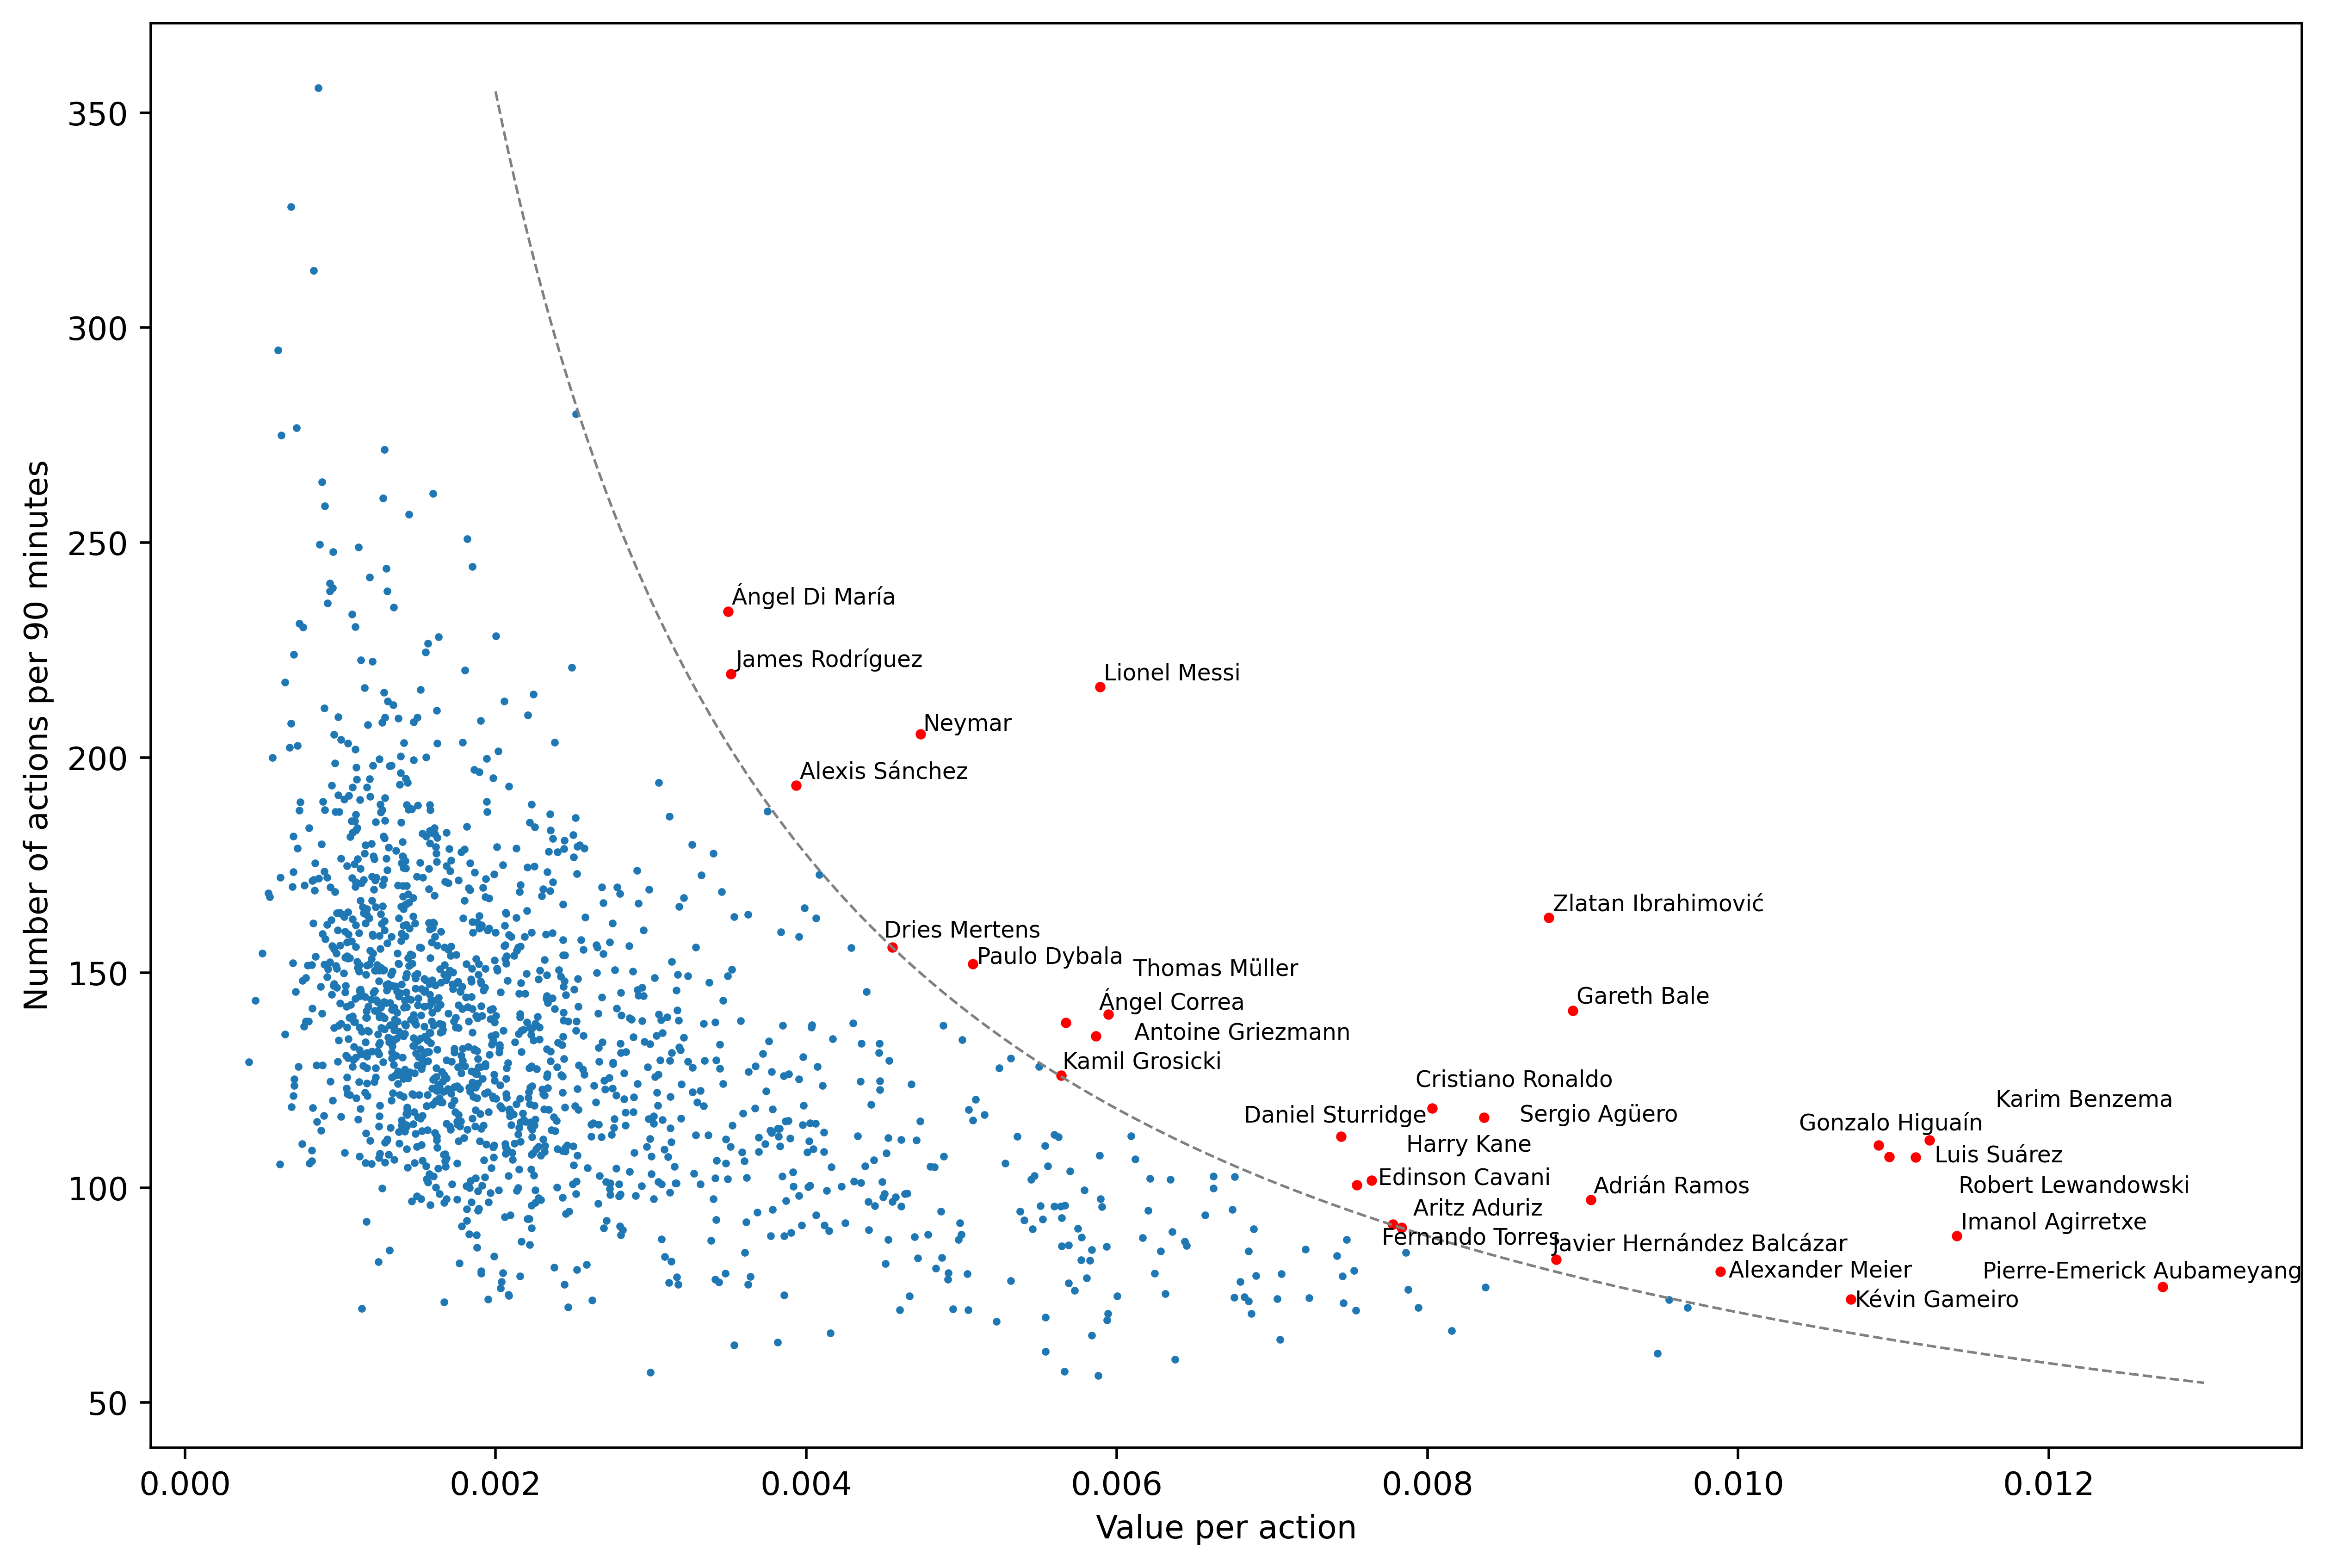

In [10]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

result_top = result.sort_values('vaep_per_90', ascending=False).head(30)
x_top, y_top, names_top = result_top['vaep_per_action'].values, result_top['no_actions_per_90'].values, result_top['player_name'].values

x = np.linspace(0.002, 0.013, 400)
y = result_top['vaep_per_90'].min() / x

plt.figure(dpi=500, figsize=(12, 8))
plt.plot(x, y, color='gray', linestyle='--', linewidth=0.8)
plt.scatter(result['vaep_per_action'].values, result['no_actions_per_90'].values, s=2)
plt.scatter(x_top, y_top, s=5, c='r')

texts = []
for i, label in enumerate(names_top):
    texts.append(plt.text(x_top[i], y_top[i], label, size=7))
adjust_text(texts)

plt.xlabel('Value per action')
plt.ylabel('Number of actions per 90 minutes')
plt.show()

### VAEP得分稳定性

In [11]:
'''
from socceraction.data.statsbomb import StatsBombLoader

path = 'D:\Football Data Science\Data\Event\Statsbomb\data'

api = StatsBombLoader(getter="local", root=path)

df_games = [api.games(competition_id=9, season_id=27)['game_id'].tolist(), # 德甲2015/2016赛季
            api.games(competition_id=11, season_id=27)['game_id'].tolist(), # 西甲2015/2016赛季
            api.games(competition_id=7, season_id=27)['game_id'].tolist(), # 法甲2015/2016赛季
            api.games(competition_id=2, season_id=27)['game_id'].tolist(),  # 英超2015/2016赛季
            api.games(competition_id=12, season_id=27)['game_id'].tolist()] # 意甲2015/2016赛季
df_games = [i for j in df_games for i in j]

players_extra = []
for game_id in df_games:
    player0 = api.players(game_id=game_id)[['player_id', 'game_id', 'minutes_played']]
    players_extra.append(player0)
players_extra = pd.concat(players_extra, ignore_index=True)
players_extra = players_extra[players_extra['minutes_played'] >= 45] # 要求球员上场时间至少为45分钟
players_extra
'''

'\nfrom socceraction.data.statsbomb import StatsBombLoader\n\npath = \'D:\\Football Data Science\\Data\\Event\\Statsbomb\\data\'\n\napi = StatsBombLoader(getter="local", root=path)\n\ndf_games = [api.games(competition_id=9, season_id=27)[\'game_id\'].tolist(), # 德甲2015/2016赛季\n            api.games(competition_id=11, season_id=27)[\'game_id\'].tolist(), # 西甲2015/2016赛季\n            api.games(competition_id=7, season_id=27)[\'game_id\'].tolist(), # 法甲2015/2016赛季\n            api.games(competition_id=2, season_id=27)[\'game_id\'].tolist(),  # 英超2015/2016赛季\n            api.games(competition_id=12, season_id=27)[\'game_id\'].tolist()] # 意甲2015/2016赛季\ndf_games = [i for j in df_games for i in j]\n\nplayers_extra = []\nfor game_id in df_games:\n    player0 = api.players(game_id=game_id)[[\'player_id\', \'game_id\', \'minutes_played\']]\n    players_extra.append(player0)\nplayers_extra = pd.concat(players_extra, ignore_index=True)\nplayers_extra = players_extra[players_extra[\'minutes_played

In [12]:
'''
values_games_agg = values.groupby(['player_id', 'game_id']).agg({'vaep_value':'sum'}).reset_index()
values_games_agg.columns = ['player_id', 'game_id', 'vaep_total']

result_games = pd.merge(values_games_agg, players_extra, on=['player_id', 'game_id'])
result_games = pd.merge(result_games, players[['player_name', 'player_id']])

result_games['vaep_per_90'] = result_games['vaep_total'] / result_games['minutes_played'] * 90
result_games['vaep_per_90'] = (result_games['vaep_per_90'] - result_games['vaep_per_90'].mean()) / result_games['vaep_per_90'].std()

result_games.groupby('player_name')['vaep_per_90'].std().sort_values(ascending=False).head(10)
'''

"\nvalues_games_agg = values.groupby(['player_id', 'game_id']).agg({'vaep_value':'sum'}).reset_index()\nvalues_games_agg.columns = ['player_id', 'game_id', 'vaep_total']\n\nresult_games = pd.merge(values_games_agg, players_extra, on=['player_id', 'game_id'])\nresult_games = pd.merge(result_games, players[['player_name', 'player_id']])\n\nresult_games['vaep_per_90'] = result_games['vaep_total'] / result_games['minutes_played'] * 90\nresult_games['vaep_per_90'] = (result_games['vaep_per_90'] - result_games['vaep_per_90'].mean()) / result_games['vaep_per_90'].std()\n\nresult_games.groupby('player_name')['vaep_per_90'].std().sort_values(ascending=False).head(10)\n"

### 分动作类型VAEP得分

In [13]:
values_category_agg = values.groupby(['player_id', 'type_name']).agg({'vaep_value':['sum','mean']}).reset_index()
values_category_agg.columns = ['player_id', 'type_name', 'vaep_per_category_total', 'vaep_per_category_per_action']

result_category = pd.merge(values_category_agg, players)

result_category['vaep_per_category_per_90'] = result_category['vaep_per_category_total'] / result_category['minutes_played'] * 90
result_category = result_category[['player_name', 'type_name', 'vaep_per_category_per_90']]
result_category = result_category.pivot_table(index='player_name', columns='type_name', values='vaep_per_category_per_90')
result_category = result_category.fillna(0)
result_category.columns.name = None

result_category.head()

,bad_touch,clearance,corner_crossed,corner_short,cross,dribble,foul,freekick_crossed,freekick_short,goal,...,pass,receival,red_card,shot,shot_freekick,shot_penalty,tackle,take_on,throw_in,yellow_card
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Cresswell,-0.016001,-0.000649,0.000000,0.000000,0.028543,0.032744,-0.005186,0.000643,-0.000403,0.049119,...,0.017141,0.042554,0.000000,0.002097,-0.000950,0.000000,0.008685,0.000165,0.006545,0.000038
Aaron Hunt,-0.059344,0.001376,0.014074,-0.001041,0.019479,0.051401,-0.009641,-0.012809,-0.001689,0.011380,...,0.001040,0.118019,0.000000,0.016294,0.000000,0.001203,0.010459,-0.000519,0.000066,-0.000104
Aaron Lennon,-0.017704,-0.000793,0.000000,0.000116,0.015146,0.079254,-0.004461,0.000000,0.001271,0.212828,...,-0.010857,0.084110,0.000000,0.050694,0.000000,0.000000,0.012588,0.000401,0.000048,0.000167
Aaron Ramsey,-0.027672,0.000603,0.000461,0.000192,0.014055,0.092927,-0.012269,0.001175,-0.002394,0.108006,...,0.031234,0.218286,0.000000,0.066401,0.000000,0.000000,0.029273,-0.001905,-0.000262,-0.000447
Abdelaziz Barrada,-0.014753,-0.000549,0.029809,-0.009440,0.045878,0.109948,-0.007756,0.016796,-0.007665,0.017997,...,0.034511,0.145285,0.000793,0.066942,-0.001698,0.000953,0.015158,0.000948,-0.000812,-0.000218


In [14]:
actiontype = 'goal'
result_category[[actiontype]].sort_values(actiontype, ascending=False).head(10)

,goal
player_name,
Zlatan Ibrahimović,0.893070
Gonzalo Higuaín,0.778739
Gareth Bale,0.760801
Luis Suárez,0.739048
Karim Benzema,0.711100
Robert Lewandowski,0.667601
Imanol Agirretxe,0.649515
Cristiano Ronaldo,0.648040
Sergio Agüero,0.609456


In [15]:
actiontype = 'pass'
result_category[[actiontype]].sort_values(actiontype, ascending=False).head(10)

,pass
player_name,
Lionel Messi,0.127825
Javier Pastore,0.119070
Jérôme Boateng,0.100212
Cesc Fàbregas,0.099902
Santi Cazorla,0.095993
Andrés Iniesta,0.095332
Duda,0.092435
Jorginho,0.090939
Mats Hummels,0.087943


In [16]:
actiontype = 'dribble'
result_category[[actiontype]].sort_values(actiontype, ascending=False).head(10)

,dribble
player_name,
Neymar,0.306294
Lionel Messi,0.282090
Sofiane Boufal,0.244938
Keita Baldé,0.243363
Dries Mertens,0.237954
Leroy Sané,0.231990
Javier Pastore,0.219792
Hatem Ben Arfa,0.218594
Douglas Costa,0.216439


In [17]:
standardized_result_category = (result_category - result_category.mean()) / result_category.std()
standardized_result_category.head()

,bad_touch,clearance,corner_crossed,corner_short,cross,dribble,foul,freekick_crossed,freekick_short,goal,...,pass,receival,red_card,shot,shot_freekick,shot_penalty,tackle,take_on,throw_in,yellow_card
player_name,,,,,,,,,,,,,,,,,,,,,
Aaron Cresswell,0.137413,-0.156551,-0.435575,0.250723,1.399899,-0.496103,0.667784,-0.149945,0.342141,-0.363758,...,0.144750,-0.713162,-0.001788,-0.762707,-0.281202,-0.203034,-0.954846,0.103975,1.346305,0.286701
Aaron Hunt,-2.477813,0.061736,2.033703,-0.476248,0.646318,-0.071924,0.426427,-4.289840,-0.256796,-0.699416,...,-0.428615,0.252695,-0.001788,-0.316184,0.116847,0.653865,-0.794585,-0.075987,-0.309344,0.140183
Aaron Lennon,0.034699,-0.172104,-0.435575,0.331860,0.286086,0.561317,0.707067,-0.347849,1.122199,1.092294,...,-0.852269,-0.181298,-0.001788,0.765745,0.116847,-0.203034,-0.602241,0.166015,-0.313969,0.419512
Aaron Ramsey,-0.566780,-0.021537,-0.354745,0.385058,0.195365,0.872175,0.284096,0.013668,-0.585597,0.159996,...,0.646624,1.535980,-0.001788,1.259740,0.116847,-0.203034,0.905147,-0.440608,-0.393194,-0.211453
Abdelaziz Barrada,0.212748,-0.145809,4.794498,-6.341326,2.841198,1.259170,0.528581,4.821114,-3.041368,-0.640556,...,0.763300,0.601665,2.450002,1.276765,-0.594642,0.475627,-0.370016,0.309745,-0.533488,0.023904


### 四大球员对比

In [18]:
top_comparison = result_category.loc[['Lionel Messi', 'Cristiano Ronaldo', 'Zlatan Ibrahimović', 'Robert Lewandowski'],
                                     ['goal', 'pass', 'cross', 'dribble']].T
top_comparison

player_name,Lionel Messi,Cristiano Ronaldo,Zlatan Ibrahimović,Robert Lewandowski
goal,0.596436,0.648040,0.893070,0.667601
pass,0.127825,-0.045078,0.014406,-0.058025
cross,0.005064,0.003671,0.001876,0.009902
dribble,0.282090,0.113081,0.123093,0.097477


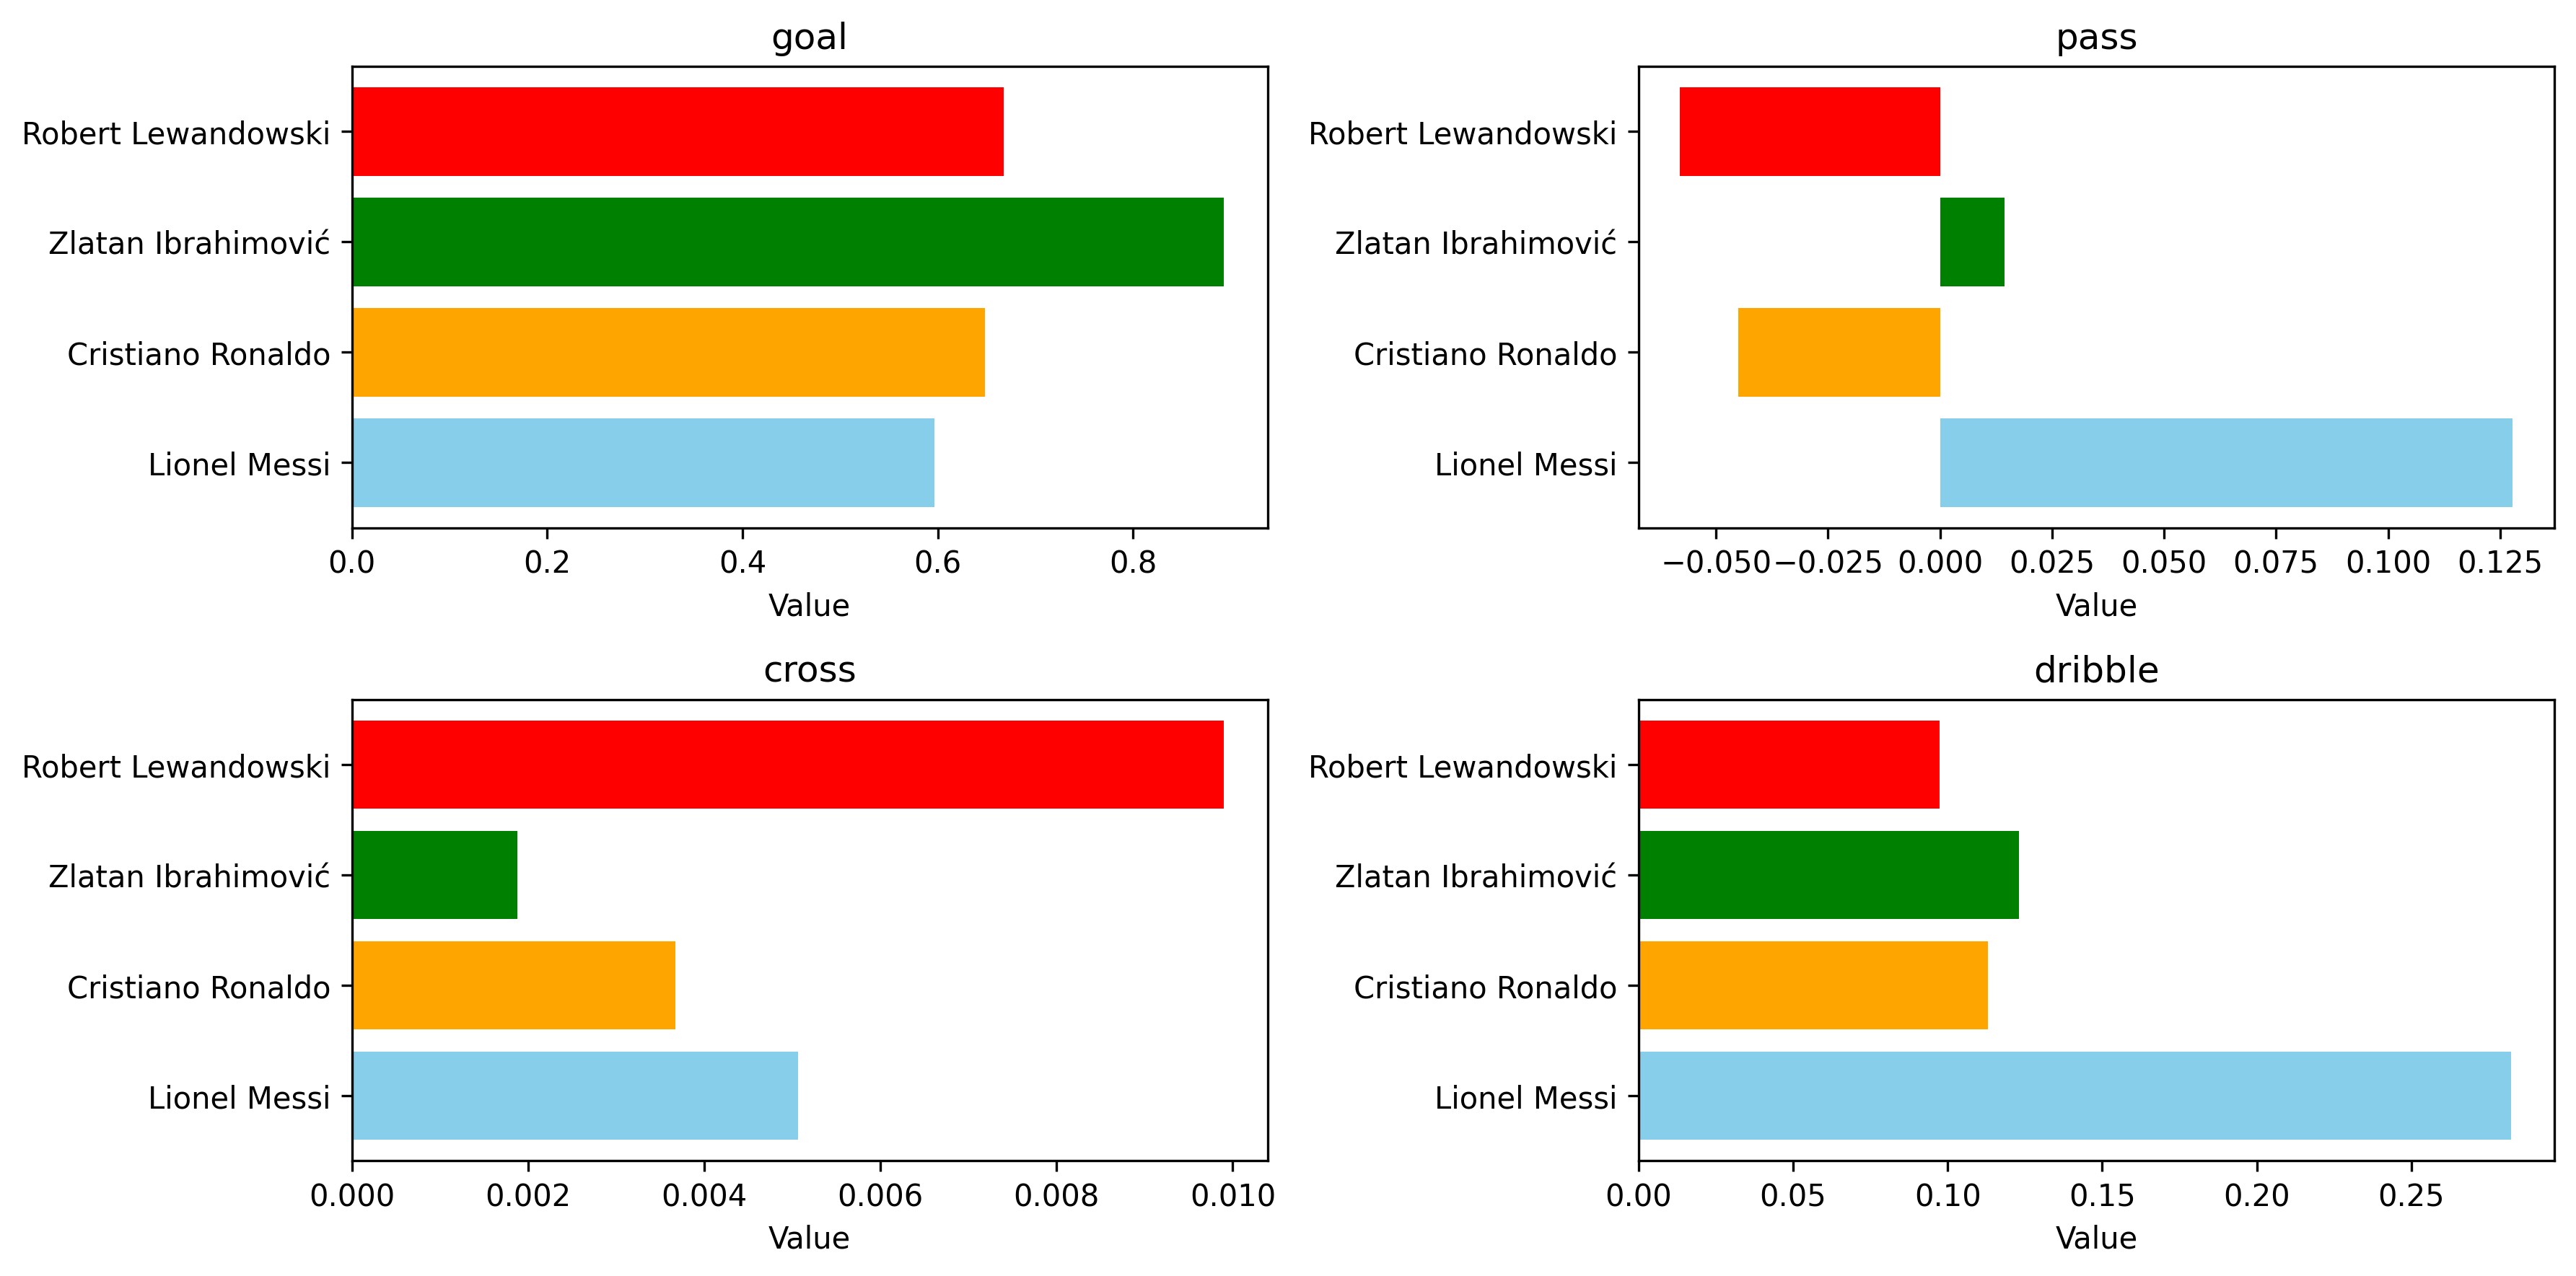

In [19]:
fig, axs = plt.subplots(2, 2, dpi=300, figsize=(12, 6), sharex=False)
indices = [(0,0), (0,1), (1,0), (1,1)]

for idx, action in enumerate(top_comparison.index):
    values0 = [top_comparison.iloc[idx][i] for i in top_comparison.columns]
    axs[indices[idx]].barh(top_comparison.columns, values0, color=['skyblue', 'orange', 'green', 'red'])
    axs[indices[idx]].set_title(action)
    axs[indices[idx]].set_xlabel('Value')
    axs[indices[idx]].set_yticklabels(top_comparison.columns)

plt.tight_layout()
plt.show()

### 梅西对比

In [20]:
Messi_vector = standardized_result_category.loc['Lionel Messi']

distances = {}
for player, vector in standardized_result_category.iterrows():
    if player != 'Lionel Messi':
        distance = np.linalg.norm(vector - Messi_vector)
        distances[player] = distance
distance_to_Messi = pd.DataFrame.from_dict(distances, orient='index', columns=['distance'])

distance_to_Messi.sort_values('distance').head(20)

,distance
Javier Pastore,8.154886
Ángel Di María,9.269314
Zlatan Ibrahimović,9.294111
Paul Pogba,10.156171
Arjen Robben,10.199574
Philippe Coutinho,10.226042
Dries Mertens,10.484837
Ángel Correa,10.694316
Marek Hamšík,10.760164
Karim Benzema,10.959952


In [21]:
Messi_comparison = result_category.loc[['Lionel Messi', 'Javier Pastore', 'Ángel Di María', 'Zlatan Ibrahimović',
                                        'Paul Pogba', 'Arjen Robben', 'Philippe Coutinho'],
                                       ['goal', 'pass', 'cross', 'dribble']].T
Messi_comparison

player_name,Lionel Messi,Javier Pastore,Ángel Di María,Zlatan Ibrahimović,Paul Pogba,Arjen Robben,Philippe Coutinho
goal,0.596436,0.132345,0.350688,0.893070,0.166236,0.177714,0.296077
pass,0.127825,0.119070,0.083646,0.014406,0.035702,-0.035012,0.058321
cross,0.005064,0.008581,0.049890,0.001876,0.017623,0.025305,0.011580
dribble,0.282090,0.219792,0.145026,0.123093,0.112289,0.203038,0.159682


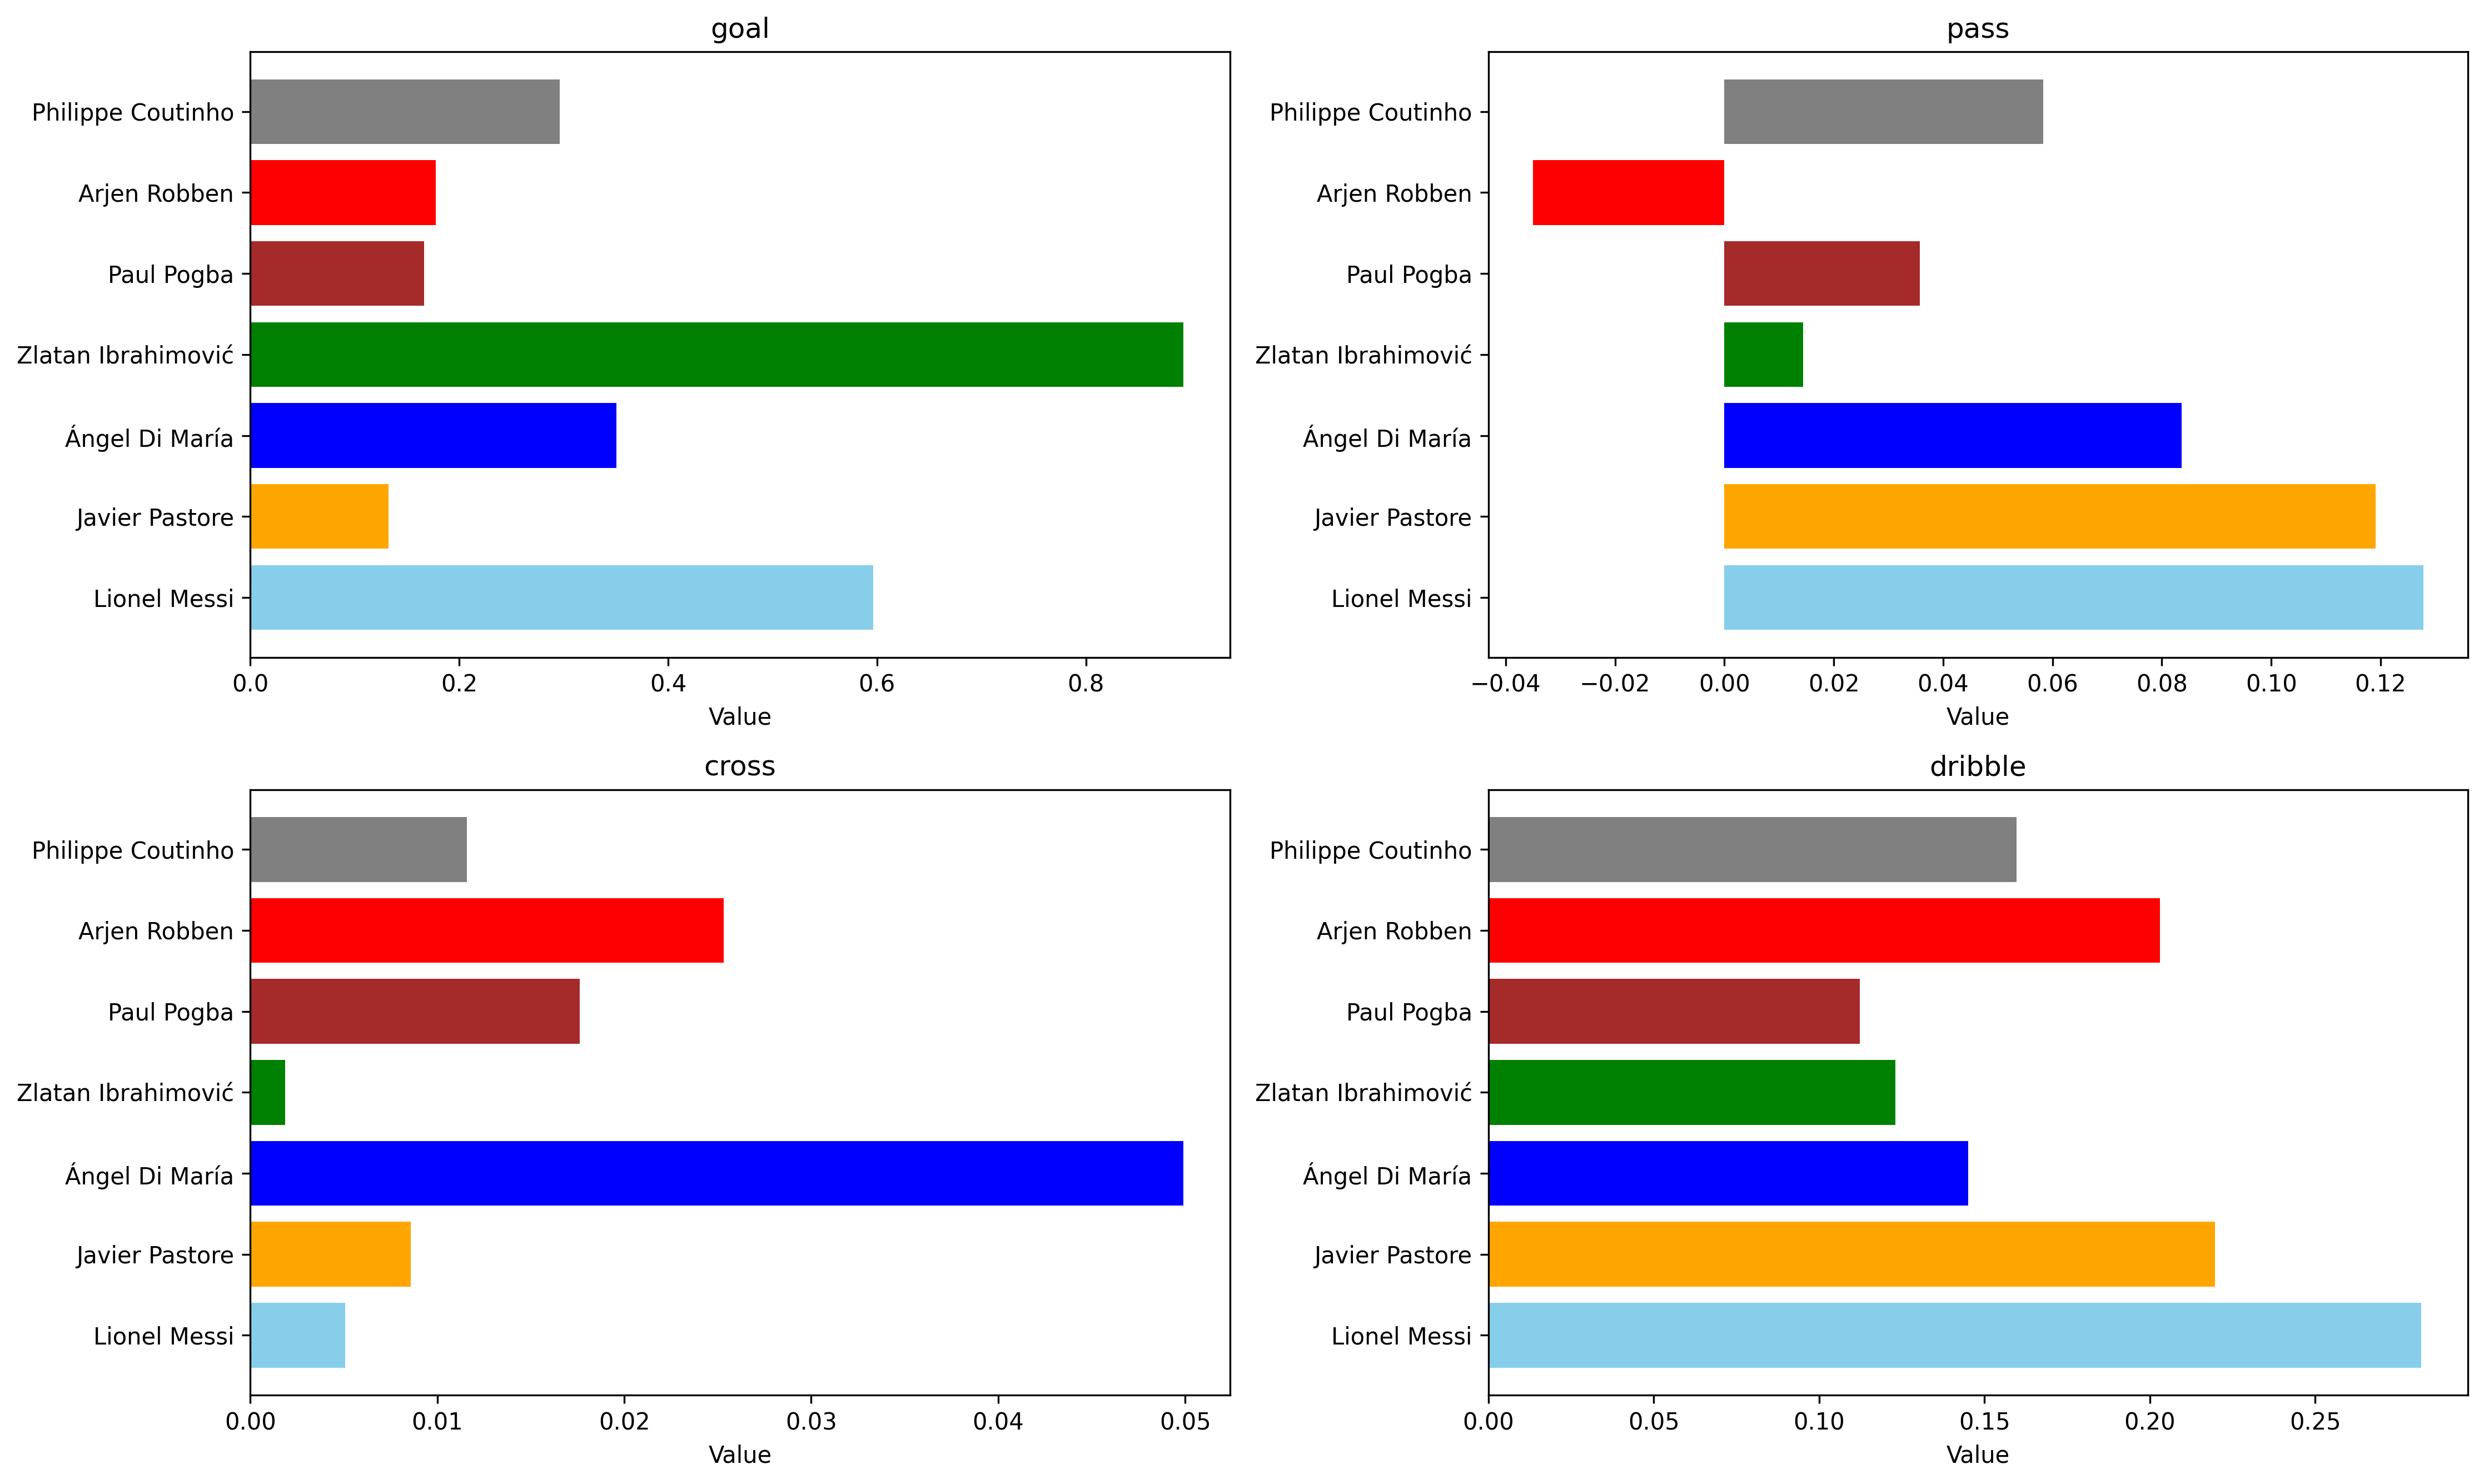

In [22]:
fig, axs = plt.subplots(2, 2, dpi=300, figsize=(15, 9), sharex=False)
indices = [(0,0), (0,1), (1,0), (1,1)]

for idx, action in enumerate(Messi_comparison.index):
    values0 = [Messi_comparison.iloc[idx][i] for i in Messi_comparison.columns]
    axs[indices[idx]].barh(Messi_comparison.columns, values0, color=['skyblue', 'orange', 'blue', 'green', 'brown', 'red', 'gray'])
    axs[indices[idx]].set_title(action)
    axs[indices[idx]].set_xlabel('Value')
    axs[indices[idx]].set_yticklabels(Messi_comparison.columns)

plt.tight_layout()
plt.show()

cross的分数高可能主要是因为cross助攻的进球，pass的分数高可能主要是因为pass助攻的进球

### 拜仁后卫对比

In [23]:
defender_comparison = result_category.loc[['Jérôme Boateng', 'Mats Hummels', 'Javi Martínez', 'Medhi Benatia'],
                                          ['goal', 'pass', 'dribble', 'clearance', 'interception', 'tackle']].T
defender_comparison

player_name,Jérôme Boateng,Mats Hummels,Javi Martínez,Medhi Benatia
goal,0.000000,0.045247,0.064995,0.069850
pass,0.100212,0.087943,0.000094,0.039821
dribble,0.067712,0.062634,0.027808,0.024819
clearance,0.017868,-0.017159,-0.004422,-0.008390
interception,0.069828,0.093651,0.065354,0.086085
tackle,0.014777,0.023742,0.017989,0.011727


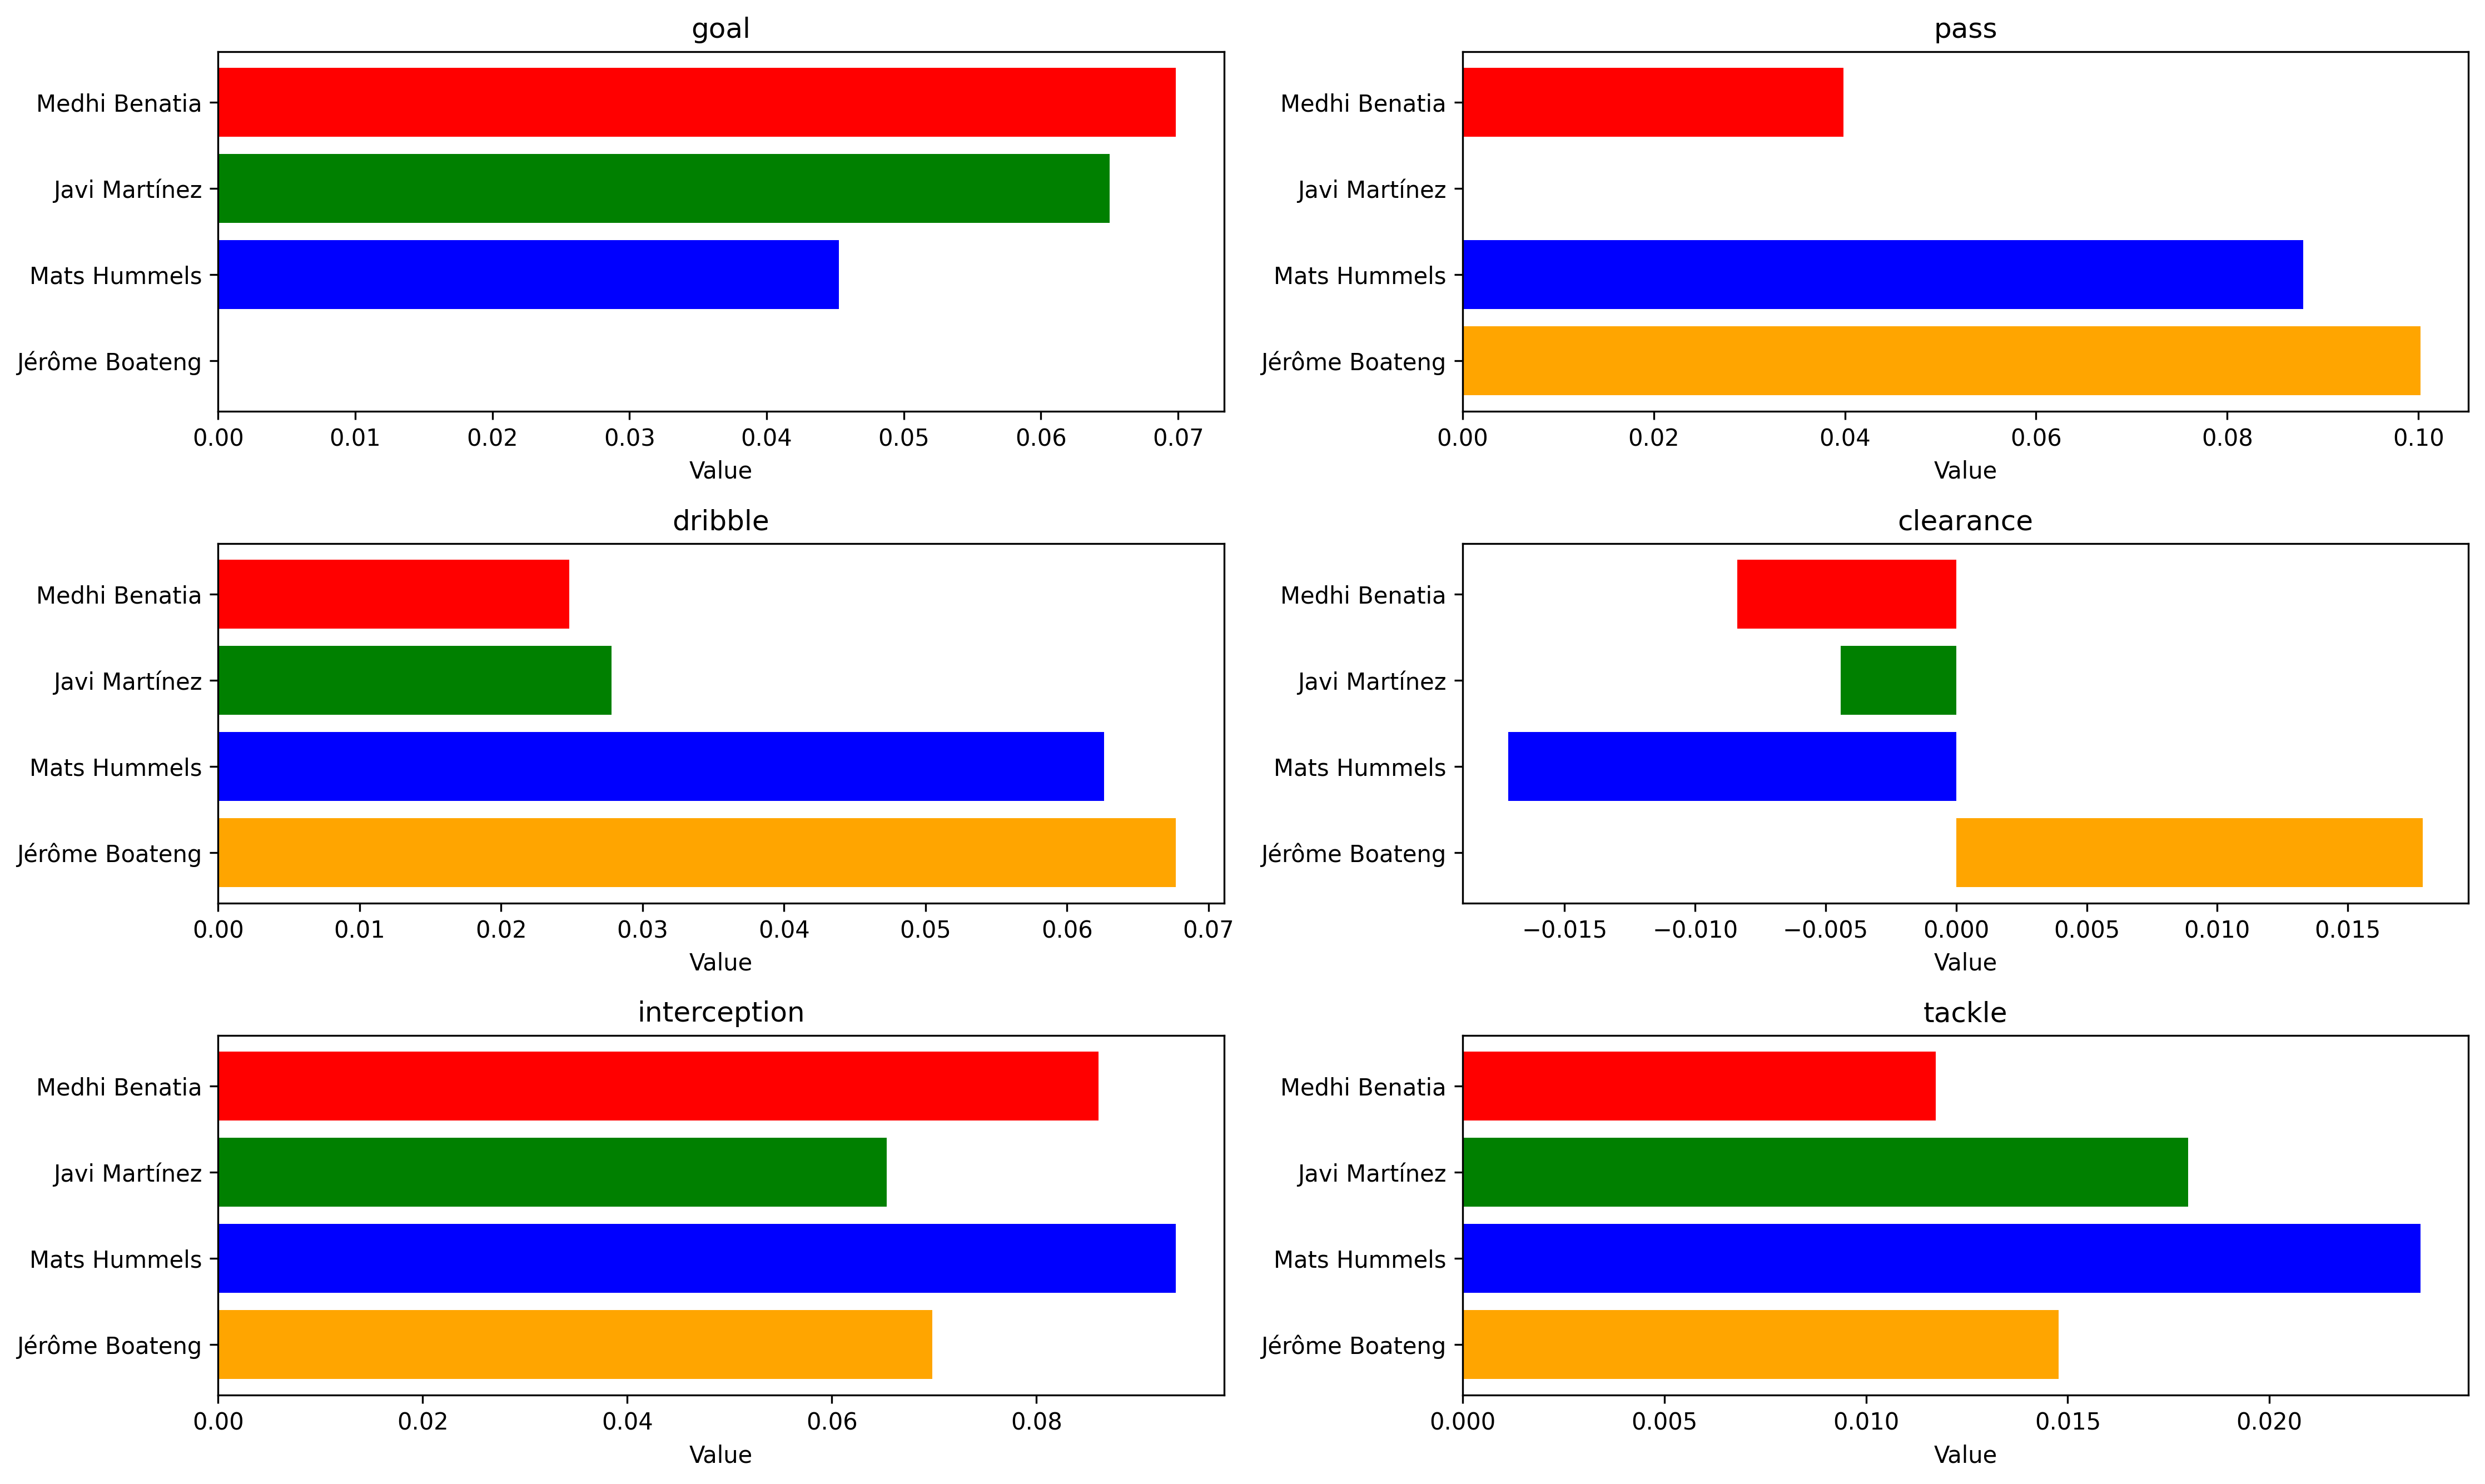

In [24]:
fig, axs = plt.subplots(3, 2, dpi=300, figsize=(15, 9), sharex=False)
indices = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]

for idx, action in enumerate(defender_comparison.index):
    values0 = [defender_comparison.iloc[idx][i] for i in defender_comparison.columns]
    axs[indices[idx]].barh(defender_comparison.columns, values0, color=['orange', 'blue', 'green', 'red'])
    axs[indices[idx]].set_title(action)
    axs[indices[idx]].set_xlabel('Value')
    axs[indices[idx]].set_yticklabels(defender_comparison.columns)

plt.tight_layout()
plt.show()

### 拉姆平替寻找

In [25]:
Lahm_vector = standardized_result_category.loc['Philipp Lahm']

distances = {}
for player, vector in standardized_result_category.iterrows():
    if player != 'Philipp Lahm':
        distance = np.linalg.norm(vector - Lahm_vector)
        distances[player] = distance
distance_to_Lahm = pd.DataFrame.from_dict(distances, orient='index', columns=['distance'])

distance_to_Lahm = pd.merge(distance_to_Lahm.reset_index().rename(columns={'index':'player_name'}),
                            players[players['starting_position_name'].apply(lambda x: 'RB' in x)])

distance_to_Lahm.sort_values('distance').head(10)

,player_name,distance,player_id,starting_position_name,minutes_played,league
204,Sergi Roberto,2.471812,6379,"['RCM', 'RB', 'CDM', 'RW', 'LB', 'LCM']",1984,LaLiga
211,Stephan Lichtsteiner,2.614061,5541,"['RWB', 'RB']",1886,SerieA
193,Rafinha,2.816021,8209,"['RCB', 'RB', 'LB', 'RWB']",1791,Bundesliga
74,Elseid Hysaj,2.860122,7031,"['LB', 'RB']",3419,SerieA
177,Nathaniel Clyne,3.051804,4590,"['RB', 'LB', 'RWB']",3166,PremierLeague
163,Matthias Ginter,3.061749,8808,"['RB', 'CDM', 'RDM', 'RCM', 'RCB', 'RWB', 'LCB']",1957,Bundesliga
24,Antonio Valencia,3.090878,3267,['RB'],920,PremierLeague
66,Davide Santon,3.245992,6999,"['RB', 'RCB']",1021,SerieA
1,Adam Smith,3.262488,6409,"['RB', 'RM', 'LB']",2257,PremierLeague
157,Martín Montoya,3.393077,6593,"['LB', 'RB']",1479,LaLiga


In [26]:
result[result['player_name'].isin(distance_to_Lahm.sort_values('distance').head(10)['player_name'].tolist()+['Philipp Lahm'])]

,player_id,vaep_total,vaep_per_action,player_name,starting_position_name,minutes_played,league,vaep_per_90,no_actions,no_actions_per_90
125,3267,2.230914,0.001104,Antonio Valencia,['RB'],920,PremierLeague,0.218242,2021.0,197.706522
399,4590,6.502909,0.001192,Nathaniel Clyne,"['RB', 'LB', 'RWB']",3166,PremierLeague,0.184858,5456.0,155.097915
471,5541,3.709629,0.001232,Stephan Lichtsteiner,"['RWB', 'RB']",1886,SerieA,0.177024,3011.0,143.685048
561,6379,2.794342,0.000698,Sergi Roberto,"['RCM', 'RB', 'CDM', 'RW', 'LB', 'LCM']",1984,LaLiga,0.126759,4006.0,181.723790
576,6409,5.758291,0.001549,Adam Smith,"['RB', 'RM', 'LB']",2257,PremierLeague,0.229617,3717.0,148.218875
591,6593,2.563227,0.000998,Martín Montoya,"['LB', 'RB']",1479,LaLiga,0.155977,2569.0,156.328600
755,6999,1.952854,0.001049,Davide Santon,"['RB', 'RCB']",1021,SerieA,0.172142,1861.0,164.045054
774,7031,5.567801,0.000798,Elseid Hysaj,"['LB', 'RB']",3419,SerieA,0.146564,6976.0,183.632641
924,8209,3.399784,0.000621,Rafinha,"['RCB', 'RB', 'LB', 'RWB']",1791,Bundesliga,0.170843,5472.0,274.974874
1034,8808,6.447459,0.001708,Matthias Ginter,"['RB', 'CDM', 'RDM', 'RCM', 'RCB', 'RWB', 'LCB']",1957,Bundesliga,0.296511,3775.0,173.607563


In [27]:
Lahm_comparison = result_category.loc[['Philipp Lahm', 'Rafinha', 'Sergi Roberto', 'Elseid Hysaj', 'Nathaniel Clyne', 'Adam Smith'],
                                      ['pass', 'cross', 'dribble', 'clearance', 'interception', 'tackle']].T
Lahm_comparison

player_name,Philipp Lahm,Rafinha,Sergi Roberto,Elseid Hysaj,Nathaniel Clyne,Adam Smith
pass,-0.024863,0.015008,-0.037255,-0.009614,0.023794,-0.010866
cross,0.020500,0.030165,0.008787,0.018935,0.017808,0.017185
dribble,0.085800,0.027669,0.042685,0.033465,0.050091,0.062675
clearance,-0.000479,0.002359,-0.001689,-0.001315,-0.002219,0.000749
interception,0.049799,0.047824,0.050362,0.064075,0.050082,0.057989
tackle,0.009271,0.014751,0.018904,0.015763,0.015038,0.004241


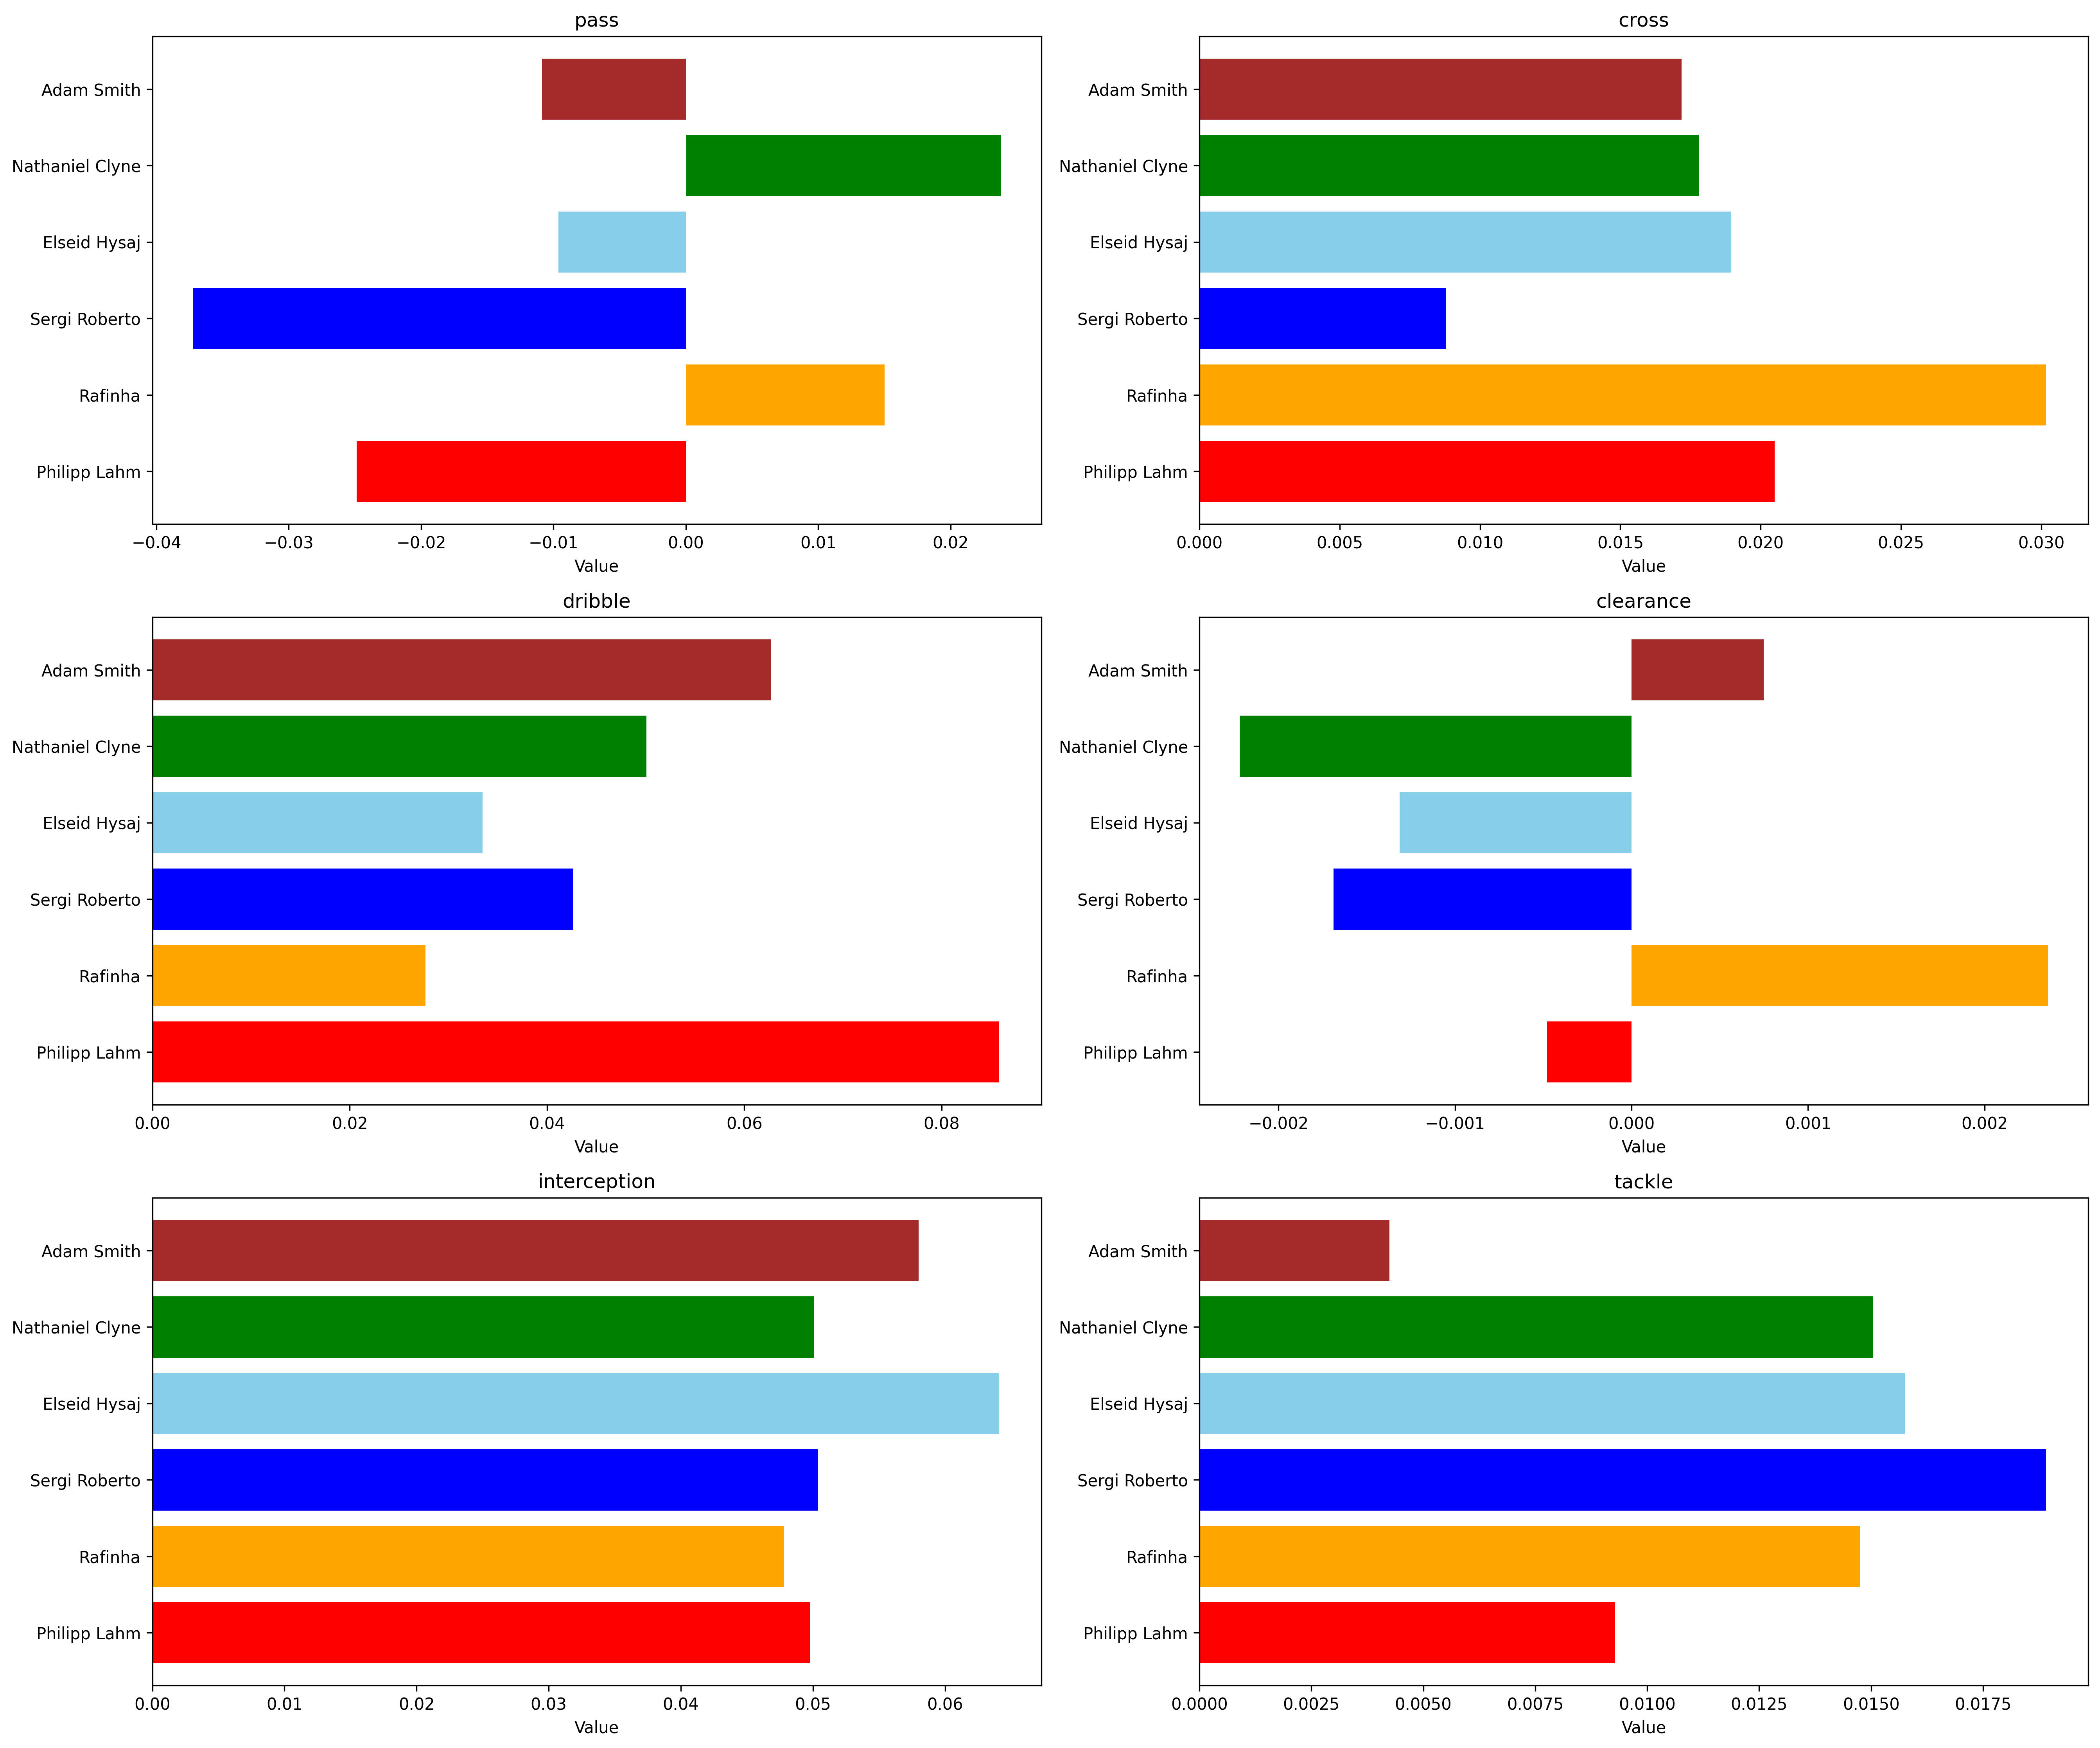

In [28]:
fig, axs = plt.subplots(3, 2, dpi=300, figsize=(18, 15), sharex=False)
indices = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]

for idx, action in enumerate(Lahm_comparison.index):
    values0 = [Lahm_comparison.iloc[idx][i] for i in Lahm_comparison.columns]
    axs[indices[idx]].barh(Lahm_comparison.columns, values0, color=['red', 'orange', 'blue', 'skyblue', 'green', 'brown'])
    axs[indices[idx]].set_title(action)
    axs[indices[idx]].set_xlabel('Value')
    axs[indices[idx]].set_yticklabels(Lahm_comparison.columns)

plt.tight_layout()
plt.show()